# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [4]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [5]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

Compute frequencies by status

In [15]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,232
Treatment,166


col_0,Frequency
status,
Control,0.582915
Treatment,0.417085


<font size = "5">

Query with string conditions

In [7]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [8]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,23.529070,5.430233,191.220930,2947.226744,15.518605
std,7.689263,1.706819,104.934778,837.052208,2.778321
min,9.000000,3.000000,70.000000,1613.000000,9.000000
25%,17.500000,4.000000,98.000000,2243.000000,13.500000
50%,23.000000,4.000000,143.500000,2750.000000,15.400000
75%,29.000000,8.000000,260.500000,3522.500000,17.000000
max,43.400000,8.000000,455.000000,5140.000000,24.800000


,mpg,cylinders,displacement,weight,acceleration
count,226.000000,226.000000,226.000000,226.000000,226.000000
mean,23.503540,5.473451,195.106195,2988.079646,15.605752
std,7.928059,1.700119,103.960665,855.647187,2.747461
min,10.000000,3.000000,68.000000,1795.000000,8.000000
25%,17.000000,4.000000,107.000000,2220.750000,14.000000
50%,22.750000,4.000000,151.000000,2860.000000,15.500000
75%,29.000000,8.000000,292.000000,3649.500000,17.300000
max,46.600000,8.000000,455.000000,4997.000000,24.600000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [9]:
def fn_columnapply (mpg):
    if (mpg>=10):
        str_return = "mpg is greater than or equal to 10"
    else:
        str_return = "mpg is less than 10"
    return (str_return)

carfeatures["greater or less than"] = carfeatures["mpg"].apply(fn_columnapply)
display (carfeatures)


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,greater or less than
0,18.0,8,307,130,3504,12.0,C-1689780,Control,mpg is greater than or equal to 10
1,15.0,8,350,165,3693,11.5,B-1689791,Control,mpg is greater than or equal to 10
2,18.0,8,318,150,3436,11.0,P-1689802,Control,mpg is greater than or equal to 10
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment,mpg is greater than or equal to 10
4,17.0,8,302,140,3449,10.5,F-1689824,Control,mpg is greater than or equal to 10
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control,mpg is greater than or equal to 10
394,44.0,4,97,52,2130,24.6,V-1694114,Control,mpg is greater than or equal to 10
395,32.0,4,135,84,2295,11.6,D-1694125,Control,mpg is greater than or equal to 10
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment,mpg is greater than or equal to 10


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [10]:

median = carfeatures["mpg"].median()
mean = carfeatures["mpg"].mean()
min = carfeatures["mpg"].min()
max = carfeatures["mpg"].max()


data_subset1 = carfeatures.query ("(mpg >= @median) & (cylinders == 8)")
data_subset2 = carfeatures.query ("(mpg<= @median) & (mpg <= @mean)")
data_subsetextremes= carfeatures.query ("(mpg==@max) | (mpg==@min)") 
data_subset_notextremes= carfeatures.query ("(mpg!=@max) & (mpg!=@min)") #everything but min and max
display (data_subsetextremes)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,greater or less than
28,9.0,8,304,193,4732,18.5,H-1690088,Treatment,mpg is less than 10
322,46.6,4,86,65,2110,17.9,M-1693322,Control,mpg is greater than or equal to 10


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [11]:
car_ascendingmpg = carfeatures.sort_values(by = "mpg", ascending = True)
carfeatures.iloc[0:1,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,greater or less than
0,18.0,8,307,130,3504,12.0,C-1689780,Control,mpg is greater than or equal to 10


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [12]:
list_status  = ["Treatment","Control"]
size_dataset = len(carfeatures)
prop_status  = [0.4,0.6]

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

data_treated = carfeatures.query("status == @list_status[0] ")
data_control = carfeatures.query ("status == @list_status[1]")
#display (data_control)
#display (data_treated)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,greater or less than
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment,mpg is greater than or equal to 10
1,15.0,8,350,165,3693,11.5,B-1689791,Control,mpg is greater than or equal to 10
2,18.0,8,318,150,3436,11.0,P-1689802,Control,mpg is greater than or equal to 10
3,16.0,8,304,150,3433,12.0,A-1689813,Control,mpg is greater than or equal to 10
4,17.0,8,302,140,3449,10.5,F-1689824,Control,mpg is greater than or equal to 10
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control,mpg is greater than or equal to 10
394,44.0,4,97,52,2130,24.6,V-1694114,Control,mpg is greater than or equal to 10
395,32.0,4,135,84,2295,11.6,D-1694125,Control,mpg is greater than or equal to 10
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment,mpg is greater than or equal to 10


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [13]:
def my_fn (y,x,b0,b1):
    z = (b0 + b1) + (x**y)
    med = carfeatures["mpg"].median()
    return (z + med)

my_fn (data_treated["mpg"],data_control["mpg"],3,4)


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
393   NaN
394   NaN
395   NaN
396   NaN
397   NaN
Name: mpg, Length: 398, dtype: float64

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

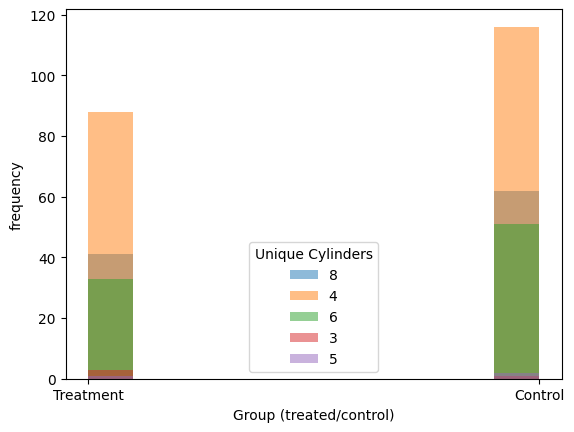

In [14]:
list_unique_cyl = pd.unique(carfeatures["cylinders"])

for category in list_unique_cyl:
    temp_df   = carfeatures.query("cylinders == @category") 
    plt.hist(x = temp_df["status"], alpha = 0.5)
    
plt.xlabel("Group (treated/control)")
plt.ylabel("frequency")
plt.legend(labels = list_unique_cyl,
           title  = "Unique Cylinders")
plt.show()